<a href="https://colab.research.google.com/github/machiwao/CCDATSCL_EXERCISES_COM222-ML/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [271]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [272]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [273]:
# put your answer here
cols = df.columns
cols

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [274]:
# put your answer here
shape_info = df.shape
shape_info

(8807, 12)

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [275]:
# put your answer here
missing_counts = df.isna().sum()
missing_counts

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [276]:
# put your answer here
df_clean = df.dropna(subset=['duration'])
df_clean.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,0


4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [277]:
# put your answer here
df_num = df_clean[['type','release_year', 'duration']].copy()
df_num

,type,release_year,duration
0,Movie,2020,90 min
1,TV Show,2021,2 Seasons
2,TV Show,2021,1 Season
3,TV Show,2021,1 Season
4,TV Show,2021,2 Seasons
...,...,...,...
8802,Movie,2007,158 min
8803,TV Show,2018,2 Seasons
8804,Movie,2009,88 min
8805,Movie,2006,88 min


In [278]:
# Create a new column to capture dur_minutes by getting only the numeric value in duration column
df_num['dur_minutes'] = df_num['duration'].str.extract('(\d+)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2422274552.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_num['dur_minutes'] = df_num['duration'].str.extract('(\d+)').astype(float)


In [279]:
# Create a new column dur_units to capture the unit of value by removing the numeric value in duration column
df_num['dur_units'] = df_num['duration'].str.extract('(\D+)').astype(str)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-4246612959.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_num['dur_units'] = df_num['duration'].str.extract('(\D+)').astype(str)


In [280]:
df_num['dur_units'].value_counts()

,count
dur_units,
min,6128
Season,1793
Seasons,883


In [281]:
'''
Up to 1990 - 32 episodes x 27 = 864
1990 to 2000 - 24 x 33.5 = 804
2000-2012 - 22 x 45 = 990
2013 - 13 x 45 = 585
2014 - 12.5 x 45 = 562.5
2015 - 13 x 45 = 585
2016 - 10.5 x 45 = 472.5
2017 - 11.5 x 45 = 517.5
2018 - 10 x 45 = 450
2019 - 10 x 45 = 450
2020 - 9.5 x 45 = 427.5
2021 - 9.5 x 45 = 427.5
'''

'\nUp to 1990 - 32 episodes x 27 = 864\n1990 to 2000 - 24 x 33.5 = 804\n2000-2012 - 22 x 45 = 990\n2013 - 13 x 45 = 585\n2014 - 12.5 x 45 = 562.5\n2015 - 13 x 45 = 585\n2016 - 10.5 x 45 = 472.5\n2017 - 11.5 x 45 = 517.5\n2018 - 10 x 45 = 450\n2019 - 10 x 45 = 450\n2020 - 9.5 x 45 = 427.5\n2021 - 9.5 x 45 = 427.5\n'

In [282]:
'''
Convert duration based on the following rules:
For Type 'TV Show':
If release_year is before 1990, multiply dur_minutes by 864
If release_year is between 1990 and 2000, multiply dur_minutes by 804
If release_year is between 2000 and 2012, multiply dur_minutes by 990
If release_year is 2013 or 2015, multiply dur_minutes by 585
If release_year is 2014, multiply dur_minutes by 562.5
If release_year is 2016, multiply dur_minutes by 472.5
If release_year is 2017, multiply dur_minutes by 517.5
If release_year is 2018 or 2019, multiply dur_minutes by 450
If release_year is 2020 or 2021, multiply dur_minutes by 427.5
'''
def convert_duration(row):
    if row['type'] == 'TV Show':
        if row['release_year'] < 1990:
            return row['dur_minutes'] * 864
        elif 1990 <= row['release_year'] < 2000:
            return row['dur_minutes'] * 804
        elif 2000 <= row['release_year'] <= 2012:
            return row['dur_minutes'] * 990
        elif row['release_year'] == 2013 or row['release_year'] == 2015:
            return row['dur_minutes'] * 585
        elif row['release_year'] == 2014:
            return row['dur_minutes'] * 562.5
        elif row['release_year'] == 2016:
            return row['dur_minutes'] * 472.5
        elif row['release_year'] == 2017:
            return row['dur_minutes'] * 517.5
        elif row['release_year'] == 2018 or row['release_year'] == 2019:
            return row['dur_minutes'] * 450
        elif row['release_year'] == 2020 or row['release_year'] == 2021:
            return row['dur_minutes'] * 427.5

    return row['dur_minutes']

In [283]:
df_num.describe()

,release_year,dur_minutes
count,8804.000000,8804.000000
mean,2014.180259,69.846888
std,8.820647,50.814828
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [284]:
df_num['dur_minutes'] = df_num.apply(convert_duration, axis=1)

In [285]:
df_num.describe()

,release_year,dur_minutes
count,8804.000000,8804.000000
mean,2014.180259,357.604157
std,8.820647,687.043950
min,1925.000000,3.000000
25%,2013.000000,92.000000
50%,2017.000000,112.000000
75%,2019.000000,427.500000
max,2021.000000,10890.000000


In [286]:
# Copy contents of dur_minutes to duration
df_num['duration'] = df_num['dur_minutes']

## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [287]:
# put your answer here
dur = df_num['duration']
dur

,duration
0,90.0
1,855.0
2,427.5
3,427.5
4,855.0
...,...
8802,158.0
8803,900.0
8804,88.0
8805,88.0


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [288]:
# put your answer here
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
dur_minmax = minmax_scaler.fit_transform(dur.values.reshape(-1, 1))
df_num['duration_minmax'] = dur_minmax
dur_minmax

array([[0.00799118],
       [0.07825847],
       [0.03899146],
       ...,
       [0.00780748],
       [0.00780748],
       [0.00992009]])

Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [289]:
# put your answer here
from sklearn.preprocessing import StandardScaler
dur_zscore = StandardScaler().fit_transform(dur.values.reshape(-1, 1))
df_num['duration_zscore'] = dur_zscore
dur_zscore

array([[-0.38952291],
       [ 0.72400622],
       [ 0.10173994],
       ...,
       [-0.39243409],
       [-0.39243409],
       [-0.35895544]])

## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [290]:
# put your answer here. Use dur_minmax
dur_width_bins = pd.cut(df_num['duration'], 4)
df_num['duration_equal_width_bin'] = dur_width_bins

In [291]:
dur_width_bins.value_counts()

,count
duration,
"(-7.887, 2724.75]",8686
"(2724.75, 5446.5]",83
"(5446.5, 8168.25]",27
"(8168.25, 10890.0]",8


<Axes: >

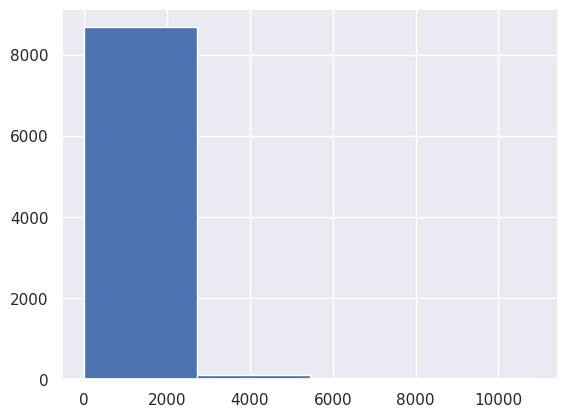

In [292]:
# Create histogram for duration that uses 4 equal-width bins
df_num['duration'].hist(bins=4)

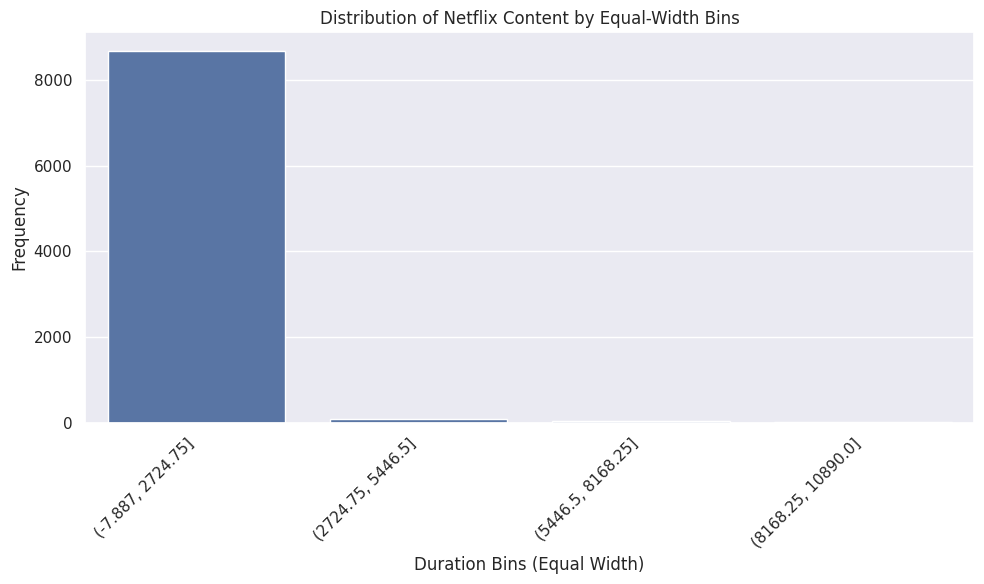

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(10, 6))
# Use countplot for categorical data (pre-binned intervals)
sns.countplot(x=df_num['duration_equal_width_bin'])
plt.xlabel('Duration Bins (Equal Width)')
plt.ylabel('Frequency')
plt.title('Distribution of Netflix Content by Equal-Width Bins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [294]:
# put your answer here
print(df_num['duration_equal_width_bin'].value_counts())
print('-' * 40)
print('Number of Movies per Bin')
print(df_num[df_num['type'] == 'Movie']['duration_equal_width_bin'].value_counts())

duration_equal_width_bin
(-7.887, 2724.75]     8686
(2724.75, 5446.5]       83
(5446.5, 8168.25]       27
(8168.25, 10890.0]       8
Name: count, dtype: int64
----------------------------------------
Number of Movies per Bin
duration_equal_width_bin
(-7.887, 2724.75]     6128
(2724.75, 5446.5]        0
(5446.5, 8168.25]        0
(8168.25, 10890.0]       0
Name: count, dtype: int64


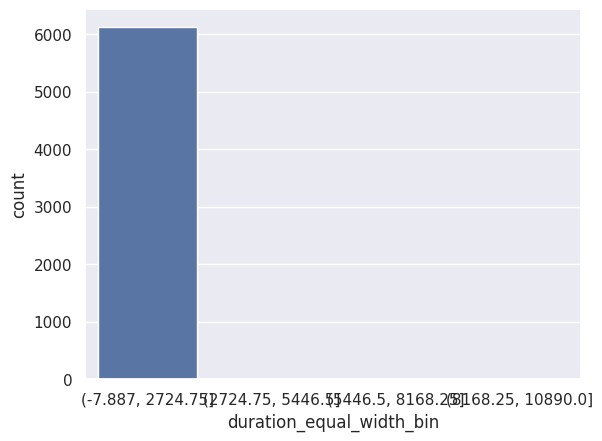

In [312]:
# Create countplot type 'Movie' per bin
h = sns.countplot(x=df_num[df_num['type'] == 'Movie']['duration_equal_width_bin'])

Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [295]:
# put your answer here
dur_quantile_bins = pd.qcut(dur, 4)
df_num['duration_equal_freq_bin'] = dur_quantile_bins
dur_quantile_bins.value_counts()

,count
duration,
"(2.999, 92.0]",2263
"(92.0, 112.0]",2212
"(427.5, 10890.0]",2182
"(112.0, 427.5]",2147


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

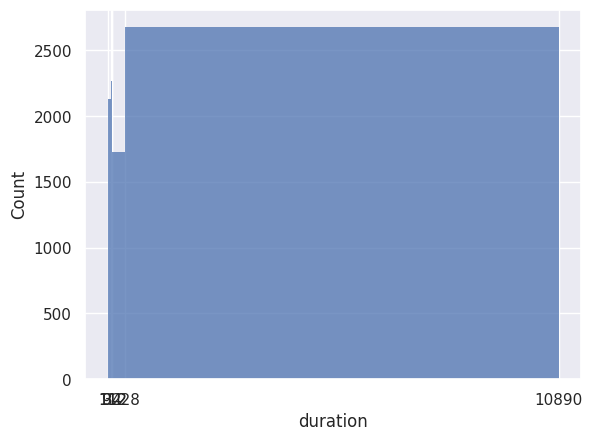

In [296]:
# Plot a histosns.set()

h = sns.histplot(df_num['duration'], bins=[2.999, 92.0, 112.0, 112.0, 427.5, 10890])
h.set_xticks([2.999, 92.0, 112.0, 112.0, 427.5, 10890])

In [297]:
# put your answer here
print(df_num['duration_equal_freq_bin'].value_counts())
print('-' * 40)
print('Number of Movies per Bin')
print(df_num[df_num['type'] == 'Movie']['duration_equal_freq_bin'].value_counts())

duration_equal_freq_bin
(2.999, 92.0]       2263
(92.0, 112.0]       2212
(427.5, 10890.0]    2182
(112.0, 427.5]      2147
Name: count, dtype: int64
----------------------------------------
Number of Movies per Bin
duration_equal_freq_bin
(2.999, 92.0]       2263
(92.0, 112.0]       2212
(112.0, 427.5]      1653
(427.5, 10890.0]       0
Name: count, dtype: int64


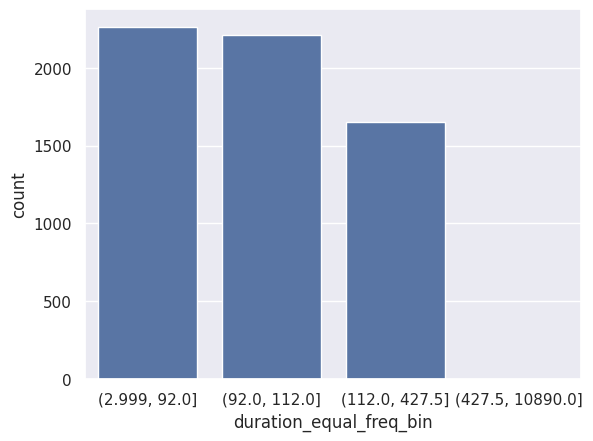

In [311]:
# Create countplot type 'Movie' per bin
h = sns.countplot(x=df_num[df_num['type'] == 'Movie']['duration_equal_freq_bin'])

Most of the movies fall under 427.5 minutes, which also includes short TV Shows/series. Netflix content more than 427.5 minutes typically involve only TV Shows and series.

## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [301]:
# put your answer here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_unscaled = KNeighborsClassifier()
X = df_num[['release_year', 'duration']]
y = df_num['type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
knn_unscaled.fit(X_train, y_train)
y_pred = knn_unscaled.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred)
acc_raw

1.0

Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [305]:
# put your answer here
standard_trainmodel = StandardScaler()
X_train_scaled = standard_trainmodel.fit_transform(X_train)
X_test_scaled = standard_trainmodel.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
acc_scaled

0.9988642816581488

Did scaling improve accuracy? Explain why.

In [310]:
# put your answer here
print(f'Accuracy before scaling: {acc_raw}')
print(f'Accuracy after scaling: {acc_scaled}')

Accuracy before scaling: 1.0
Accuracy after scaling: 0.9988642816581488


Interpretation: The initial accuracy of 1.0 before scaling indicates that the 'release_year' and 'duration' features already provided a perfect separation between 'Movie' and 'TV Show' types for the KNN classifier in this specific dataset and split. Scaling is generally crucial for distance-based algorithms like KNN to ensure all features contribute equally to distance calculations, especially when they are on different scales. However, when the classes are already perfectly (or near-perfectly) separable by the unscaled features, scaling may not offer any improvement. In rare cases, it might even lead to a very minor, statistically insignificant decrease in accuracy. This could be due to subtle alterations in the feature space that slightly disturb the previously perfect decision boundary. In essence, scaling could not improve upon an already perfect classification, and the slight drop from 1.0 to 0.9988 is negligible, indicating that the original features were already highly effective for classification."